World Happiness Report Project
Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset.


In [1]:
import pandas as pd
import numpy as np                     # Importing the Necessary Libraries.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings                              
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df.head(5)                # Importing Dataset.

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.columns  # To See all Columns.

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
df.shape  # To See the Dataset shape.

(158, 12)

In [6]:
df.isnull().sum() # To See Null Values.

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [7]:
df.info() # To See Dataset infrmation.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [8]:
# Info about Columns:
# 1.Country Name-Name of the Countries mentioned in the column(with Highest Happiness score which is ranked ,and sorted as per their ranks).
# 2.Region-Region wise where the countries is located.
# 3.Happiness Rank- The Rank of the countries is mentioned as per their Happiness score.
# 4.Happiness Score -This is our TARGET VARIABLE.
# 5.Standard Error- General Error percentage by the country.
# 6.Economy-This columns contains the economic information about the country.
# 7.Family- No of Family members,Howmuch their contribution for the Happiness .
# 8.Trust(Government Corruption)-This column indicates how much people trust their own Government Corruption as per the countries.
# 9.Generosity- How much their small acts like (kind) leads for their happiness.
# 10.Dystopia Residual-generally refers to the error ,how much their lacking from their happiness score.

In [9]:
df.dtypes  # To See the Dataset Datatypes.

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [10]:
# Country and Region is object Data Type.# remaining columns is good to go ahead.

In [11]:
df.drop_duplicates(inplace=True)  # To remove Duplicate Values.


In [12]:
df.shape # Rechecked the Shape,found no duplicate Values.

(158, 12)

 STATISTICAL SUMMARY.

In [13]:
df.describe() # To Check the Descriptive Statistics.

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [14]:
# Observations:
# 1.count is same,No Null values Present.
# 2.STD of Happiness Rank is High

                            Visualization of The Dataset 

In [15]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [16]:
df['Happiness Rank']=df['Happiness Rank'].astype(float) # Happiness Rank column is converted into float type

In [17]:
df.dtypes # Rechecking the Datatypes.

Country                           object
Region                            object
Happiness Rank                   float64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [18]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [19]:
visualization=df[['Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']].copy()                # to Check the Distribution of each column, we are creating the copy dataset of the nominal columns.

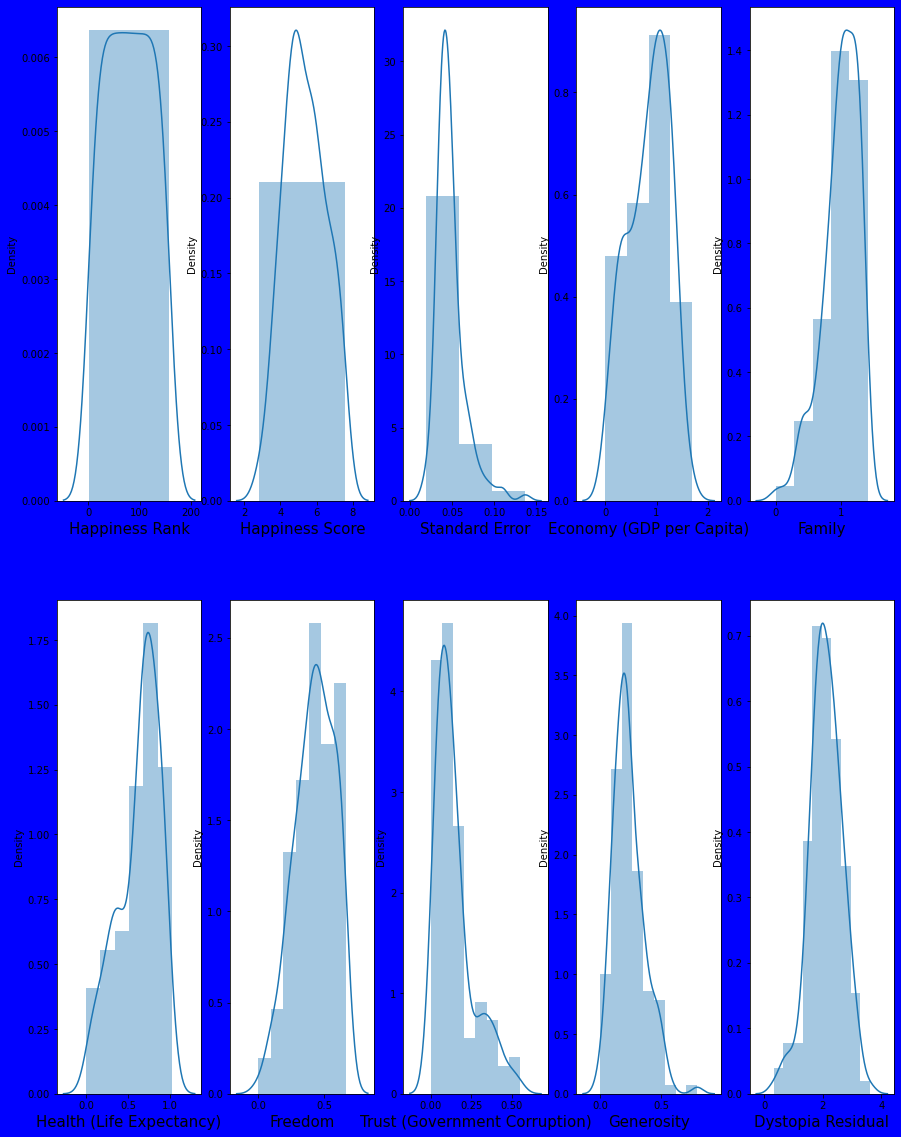

In [20]:
plt.figure(figsize=(15,20),facecolor='blue')
plotnumber=1
for column in visualization:
    if plotnumber<=10:
        ax=plt.subplot(2,5,plotnumber)
        sns.distplot(visualization[column],plotnumber)
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [21]:
# Observations:
# 1. Happiness Rank- we can see It is Normally distributed.
# 2. happiness Score- data is normally distributed.
# 3. Standard Error: we can see some skewness.
# 4. GDP-Normally Distributed.
# 5. Family-little skewness is there in the Dataset.
# Trust,Generosity,Dystopia Residual columns-having skewness.

In [22]:
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

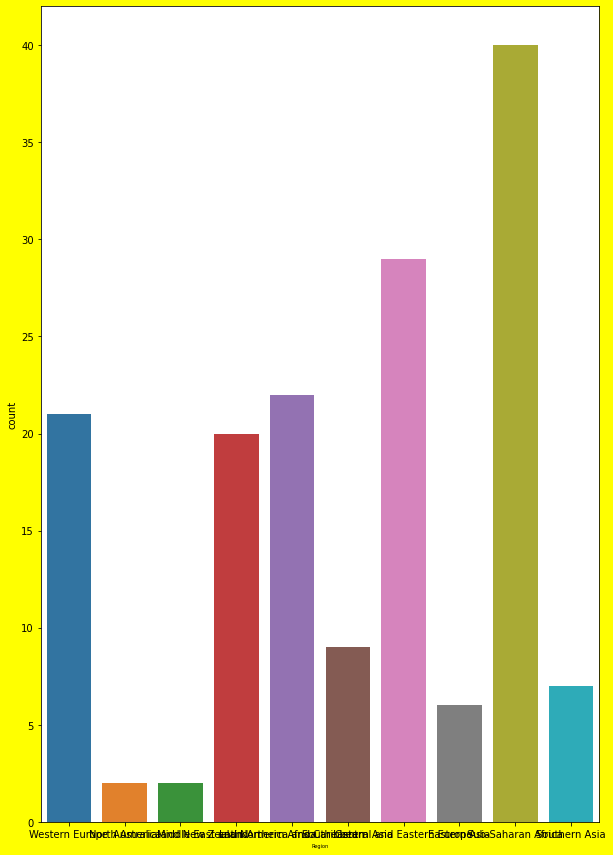

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


In [23]:
plt.figure(figsize=(10,15),facecolor='yellow')
ax=sns.countplot(df['Region'])
plt.xlabel('Region',fontsize=5)
plt.show()
print(df['Region'].value_counts())

In [24]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154.0,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155.0,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156.0,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157.0,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


                                   Encoding 

In [25]:
from sklearn.preprocessing import OrdinalEncoder  # Encoding the Categorical Columns,importing the Necessary Libraries.

In [26]:
oe=OrdinalEncoder() # Using Ordinal Encoder to encode categorical columns.

In [27]:
for i in df.columns:                                               #object column encoded.
    if df[i].dtype=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

In [28]:
df.dtypes                # Checking the Data type.

Country                          float64
Region                           float64
Happiness Rank                   float64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [29]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154.0,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,155.0,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,156.0,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,157.0,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [30]:
features=df.drop(columns='Happiness Score',axis=1)
features

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1.0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2.0,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3.0,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4.0,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5.0,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154.0,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,155.0,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,156.0,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,157.0,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [31]:
target=df['Happiness Score']

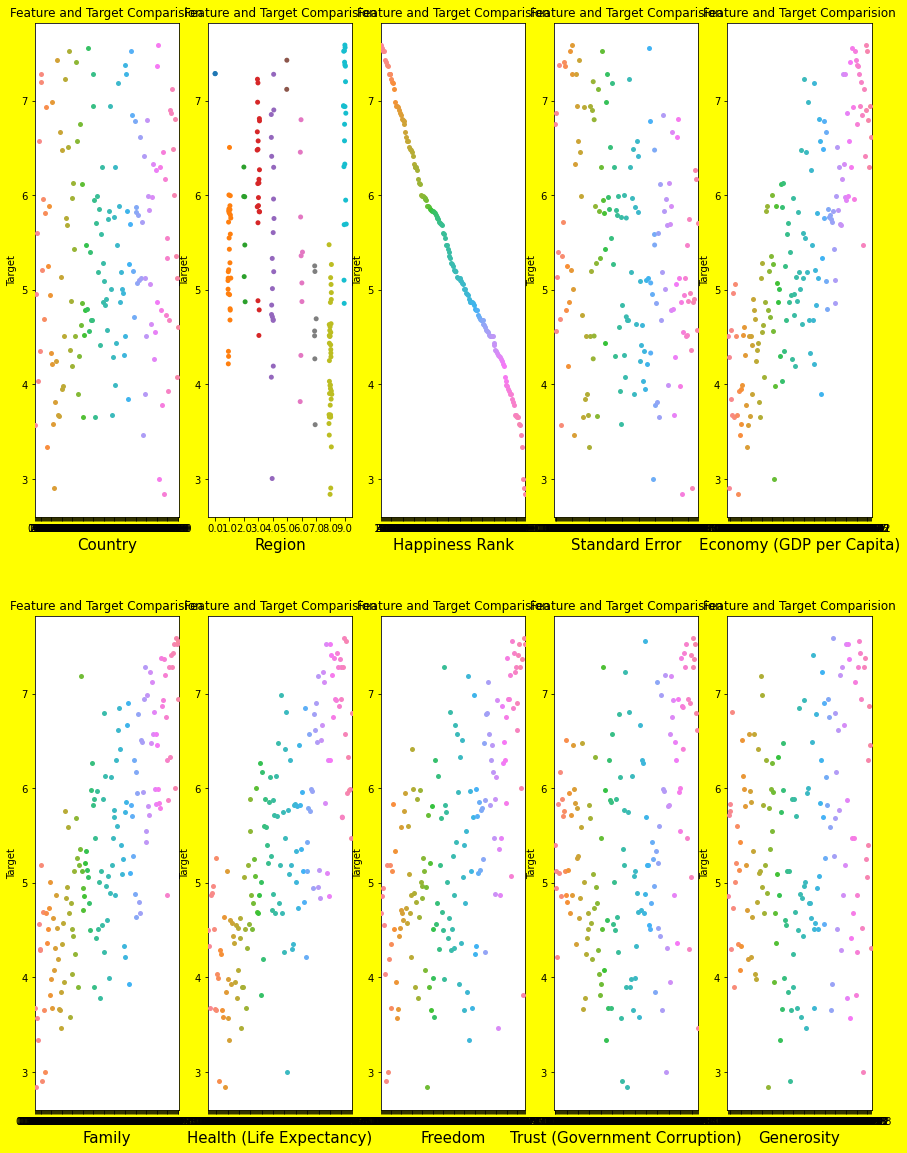

In [36]:
plt.figure(figsize=(15,20),facecolor='yellow')
plotnumber=1
for column in features:
    if plotnumber<=10:
        plt.subplot(2,5,plotnumber)
        ax=sns.stripplot(x=features[column],y=target)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Target')
        plt.title('Feature and Target Comparision')
    plotnumber+=1
plt.show()

checking the correlation using Heat map.

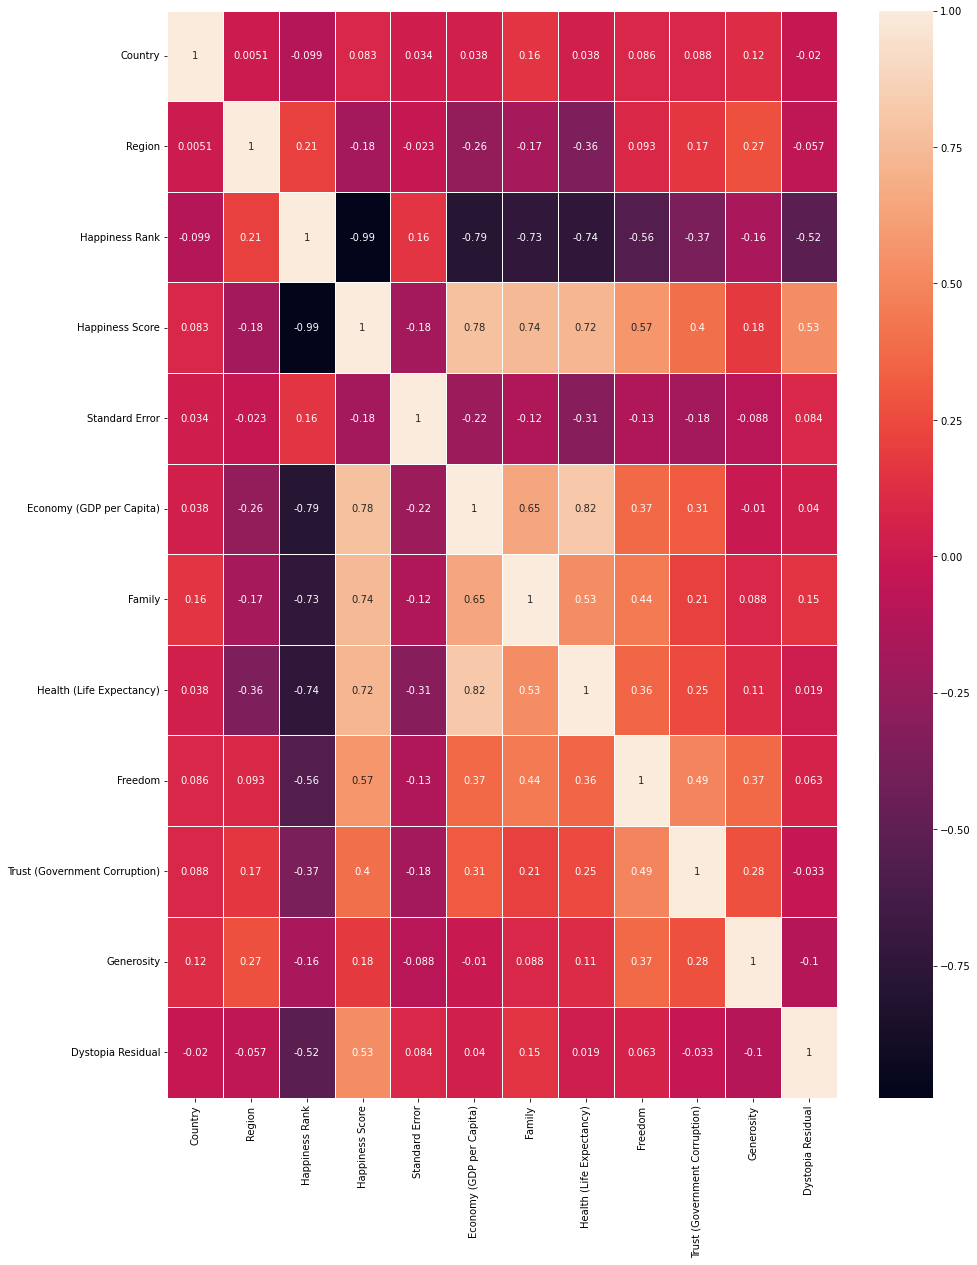

In [37]:
corr=df.corr()
plt.figure(figsize=(15,20))
sns.heatmap(corr,annot=True,linewidths=0.5)
plt.show()

In [38]:
corr['Happiness Score'].sort_values(ascending=False)  # checking the corelation of the Values with Target column.

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Country                          0.083380
Region                          -0.176791
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64

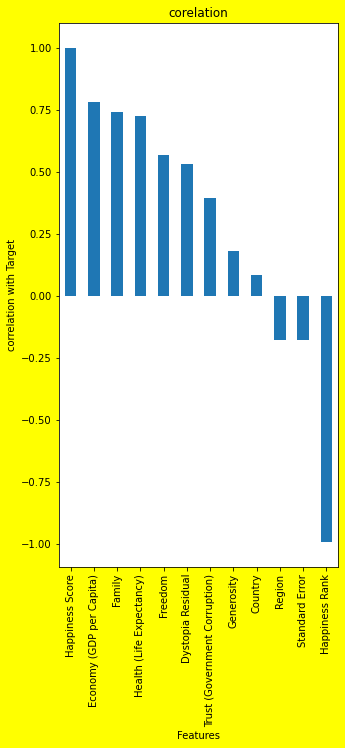

In [39]:
# Plotting the Corelation of the Values.
plt.figure(figsize=(5,10),facecolor='yellow')
corr['Happiness Score'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel("Features")
plt.ylabel("correlation with Target")
plt.title("corelation")
plt.show()

In [40]:
# observations:
#1. Economy,Family,Health columns have Postive and strong corelation with Target Variable.
#2. Freedom,Dystopia Residual is having medium correlation with Target Variable.
# 3.Region,Standard Error is having Negative correlation with Target Variable.
#4.Not Removing any columns as the Dataset is small.

          CHECKING SKEWNESS.

In [41]:
df.skew() # we have checked for the Skewness.

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

                   Pre Processing.

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
# splitting The Dataset into Target and Features.
x=df.drop(columns='Happiness Score',axis=1)
x

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1.0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2.0,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3.0,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4.0,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5.0,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154.0,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,155.0,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,156.0,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,157.0,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [44]:
y=df['Happiness Score']
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [45]:
 # Using Standard Scaler in Features.

In [46]:
scaled=StandardScaler()
x_scaled=scaled.fit_transform(x)
x_scaled

array([[ 1.23877001,  1.30025593, -1.72099989, ...,  2.30965159,
         0.47103971,  0.75825809],
       [-0.44946522,  1.30025593, -1.69907456, ..., -0.01647953,
         1.57585637,  1.09285682],
       [-0.90989302,  1.30025593, -1.67714922, ...,  2.8427738 ,
         0.8242928 ,  0.71233526],
       ...,
       [ 1.26069514, -0.37544095,  1.67742676, ...,  0.38141902,
         1.85689094, -3.20843049],
       [-1.26069514,  0.96511655,  1.69935209, ..., -0.35771452,
        -0.31694987, -0.48198451],
       [ 1.37032081,  0.96511655,  1.72127743, ..., -0.30180313,
        -0.5581534 , -0.96361241]])

                         PCA(PRINICIPALCOMPONENT ANALYSIS)

In [47]:
from sklearn.decomposition import PCA # Importing PCA.

In [48]:
pca=PCA()
pca.fit_transform(x_scaled)

array([[-3.77959677,  1.83364742,  0.67767337, ...,  0.10254957,
        -0.232311  , -0.12337538],
       [-3.01126061,  1.02059384,  1.19297758, ...,  0.26055388,
        -0.19632427, -0.12807693],
       [-3.57058627,  2.00811747,  0.35026721, ..., -0.66022813,
        -0.23028148, -0.06375915],
       ...,
       [ 2.15326333,  1.48686235, -2.83652251, ..., -0.16940282,
        -0.03255865,  0.27402718],
       [ 4.6764524 ,  0.10041064,  0.67686896, ..., -0.23077115,
        -0.42436149,  0.38564166],
       [ 3.94555831,  1.10358828,  0.14551329, ...,  1.66431549,
         0.13651502,  0.35296812]])

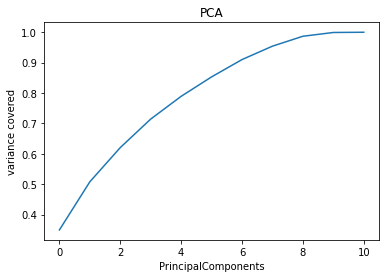

In [49]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('PrincipalComponents')
plt.ylabel('variance covered')
plt.title('PCA')
plt.show()

In [50]:
# observation:
# observing the spree plot,felt that we can choose components =7,to achieve 100% variance of the DataSet.

In [51]:
pca=PCA(n_components=7)
new_pca=pca.fit_transform(x_scaled)
comp=pd.DataFrame(new_pca,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7'])
comp

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,-3.779597,1.833647,0.677673,0.091764,-0.844853,-1.231774,-0.254331
1,-3.011261,1.020594,1.192978,-0.839670,0.235533,1.219926,-1.201747
2,-3.570586,2.008117,0.350267,-1.740269,0.142268,-1.056998,-0.105477
3,-3.534380,1.794133,0.682236,-0.285167,-0.303936,-0.665598,-0.463623
4,-3.407442,1.185110,0.092423,-1.455527,0.557053,0.664749,0.432349
...,...,...,...,...,...,...,...
153,1.164711,3.595514,-1.866949,0.721022,0.249588,-2.645859,1.203991
154,3.141033,1.031531,-1.001893,-1.587267,0.062751,-0.200164,0.257966
155,2.153263,1.486862,-2.836523,2.273908,0.566969,0.801409,1.052704
156,4.676452,0.100411,0.676869,-0.545576,1.447970,-0.323095,0.040808


In [52]:
# Train _Test _split(Imporing and fitting the Data)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [60]:
# To choose Best Random State:
Lr=LinearRegression()
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(comp,y,test_size=0.25,random_state=i)
    Lr.fit(x_train,y_train)
    pred_train=Lr.predict(x_train)
    pred_test=Lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print("At Random State :",i,"The Model performs well")
        print("The Random State:",i)
        print("The Training Score is:",r2_score(y_train,pred_train)*100)
        print("The Testing Score is:",r2_score(y_test,pred_test)*100)
        print("The Difference between the score is",(r2_score(y_train,pred_train)*100-r2_score(y_test,pred_test)*100))

    
    

At Random State : 0 The Model performs well
The Random State: 0
The Training Score is: 99.3154237563864
The Testing Score is: 99.06578954598044
The Difference between the score is 0.2496342104059579
At Random State : 1 The Model performs well
The Random State: 1
The Training Score is: 99.23396752900064
The Testing Score is: 99.40504602177313
The Difference between the score is -0.17107849277249443
At Random State : 2 The Model performs well
The Random State: 2
The Training Score is: 99.27548122002918
The Testing Score is: 99.22490098972638
The Difference between the score is 0.05058023030279912
At Random State : 3 The Model performs well
The Random State: 3
The Training Score is: 99.23598478331877
The Testing Score is: 99.30914119712288
The Difference between the score is -0.07315641380411364
At Random State : 4 The Model performs well
The Random State: 4
The Training Score is: 99.15196527774793
The Testing Score is: 99.48785661770474
The Difference between the score is -0.335891339956

In [61]:
# Choosing RandomState as 55,the Model performs well.

In [62]:
x_train,x_test,y_train,y_test=train_test_split(comp,y,test_size=0.25,random_state=55)

In [63]:
Lr.fit(x_train,y_train)  # Training the model with Random state 

LinearRegression()

In [64]:
pred_test=Lr.predict(x_test)
pred_test

array([5.47987282, 6.6461298 , 5.04315643, 5.78395888, 5.61713033,
       5.92874722, 5.19664534, 7.2472816 , 4.65921515, 3.99791124,
       4.36629783, 3.71267021, 6.25569213, 7.05611397, 7.18274881,
       4.98278454, 5.26889116, 6.78844258, 5.56249867, 4.44763156,
       7.26261648, 5.48910947, 4.48738669, 3.89558476, 5.98455609,
       5.3776845 , 4.89052778, 2.96363468, 4.61631361, 6.61930005,
       4.18500788, 4.77266799, 5.98014652, 3.97522772, 7.30456567,
       5.47326002, 5.85375648, 4.25920753, 4.36774293, 5.03327487])

In [65]:
r2_score(y_test,pred_test)*100

99.34115436991262

        CROSS VALIDATION

In [66]:
# Cross Validation Score :To Check the cross val score and model score.


In [67]:

from sklearn.model_selection import cross_val_score

In [68]:
pred_lin=r2_score(y_test,pred_test)
pred_lin
    



0.9934115436991262

In [69]:
for j in range(2,10):
    cvs=cross_val_score(Lr,x,y,cv=j)
    cvm=cvs.mean()
    print("At Cross Valid Fold: ",j)
    print("The Cross Validation Score is:",cvm*100)
    print("The Model Score is :",pred_lin*100)


At Cross Valid Fold:  2
The Cross Validation Score is: 99.99997284501868
The Model Score is : 99.34115436991262
At Cross Valid Fold:  3
The Cross Validation Score is: 99.99994758122854
The Model Score is : 99.34115436991262
At Cross Valid Fold:  4
The Cross Validation Score is: 99.99988371717737
The Model Score is : 99.34115436991262
At Cross Valid Fold:  5
The Cross Validation Score is: 99.99982417917262
The Model Score is : 99.34115436991262
At Cross Valid Fold:  6
The Cross Validation Score is: 99.99971509064252
The Model Score is : 99.34115436991262
At Cross Valid Fold:  7
The Cross Validation Score is: 99.99958018280701
The Model Score is : 99.34115436991262
At Cross Valid Fold:  8
The Cross Validation Score is: 99.99955494387555
The Model Score is : 99.34115436991262
At Cross Valid Fold:  9
The Cross Validation Score is: 99.99935863400461
The Model Score is : 99.34115436991262


In [70]:
# Choosing CV=5,for where ,the difference between the Model Score and the cross valid score is less.

                      Checking other Algorithms,to see the r2_sore.

In [71]:
def metric_score(mod,x_train,x_test,y_train,y_test,train=True):
    if train==True:
        mod.fit(x_train,y_train)
        pred_train=mod.predict(x_train)
        print("The Training score of the model is:",r2_score(y_train,pred_train)*100)
    elif train==False:
        pred_test=mod.predict(x_test)
        print("The Testing score of the model is :",r2_score(y_test,pred_test)*100)
        print("Mean Squared Error is :",mean_squared_error(y_test,pred_test))
        print("Mean Absolute Error is:",mean_absolute_error(y_test,pred_test))
        
        

In [72]:
# Training the MODEL with Decision Tree Regressor.
from sklearn.tree import DecisionTreeRegressor

In [73]:
dt=DecisionTreeRegressor()


In [74]:
metric_score(dt,x_train,x_test,y_train,y_test,train=True)
metric_score(dt,x_train,x_test,y_train,y_test,train=False)

The Training score of the model is: 100.0
The Testing score of the model is : 88.08471019375939
Mean Squared Error is : 0.14102080000000003
Mean Absolute Error is: 0.2966500000000001


In [75]:
# Training the MODEL with KNNeighbor Regressor.
from sklearn.neighbors import KNeighborsRegressor

In [76]:
knn=KNeighborsRegressor()


In [77]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)


The Training score of the model is: 93.76896104396644
The Testing score of the model is : 92.54506429460126
Mean Squared Error is : 0.08823125699999992
Mean Absolute Error is: 0.23538499999999987


In [78]:
# Training the Model with SVR.
from sklearn.svm import SVR

In [79]:
svr=SVR()

In [80]:
metric_score(svr,x_train,x_test,y_train,y_test,train=True)
metric_score(svr,x_train,x_test,y_train,y_test,train=False)

The Training score of the model is: 98.7837888039274
The Testing score of the model is : 94.17763395857375
Mean Squared Error is : 0.06890933669315606
Mean Absolute Error is: 0.16822393669309235


                                     Training the Model with Ensemble Techniques.

In [81]:
from sklearn.ensemble import RandomForestRegressor                  # Training the Model with RandomForestRegressor

In [82]:
rf=RandomForestRegressor()

In [83]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True)
metric_score(rf,x_train,x_test,y_train,y_test,train=False)

The Training score of the model is: 98.93473737355528
The Testing score of the model is : 92.6651089328115
Mean Squared Error is : 0.08681049500499982
Mean Absolute Error is: 0.2057489999999992


In [84]:
from sklearn.ensemble import GradientBoostingRegressor             # Training the Model with GradientBoostRegressor.

In [85]:
gbt=GradientBoostingRegressor()

In [86]:
metric_score(gbt,x_train,x_test,y_train,y_test,train=True)
metric_score(gbt,x_train,x_test,y_train,y_test,train=False)

The Training score of the model is: 99.93307823782737
The Testing score of the model is : 96.01282952604593
Mean Squared Error is : 0.04718928193243723
Mean Absolute Error is: 0.14520423079471956


In [87]:
import xgboost as xgb      # Training the Model with XGBoost Regressor.

In [88]:
XGB=xgb.XGBRegressor()

In [90]:
metric_score(XGB,x_train,x_test,y_train,y_test,train=True)
metric_score(XGB,x_train,x_test,y_train,y_test,train=False)

The Training score of the model is: 99.99994675163808
The Testing score of the model is : 94.40263001830007
Mean Squared Error is : 0.06624644516005748
Mean Absolute Error is: 0.18804619731903074


In [91]:
from sklearn.ensemble import AdaBoostRegressor # Training the Model with Ada Boost Regressor.

In [92]:
ada=AdaBoostRegressor()


In [93]:
metric_score(ada,x_train,x_test,y_train,y_test,train=True)
metric_score(ada,x_train,x_test,y_train,y_test,train=False)

The Training score of the model is: 96.45051236649074
The Testing score of the model is : 88.19470519459045
Mean Squared Error is : 0.13971897828475538
Mean Absolute Error is: 0.2589366581034005


In [94]:
# observation:
# out of All Models found Linear Regression model is giving the r2score as 99% so we are choosing it for Hyper Tuning.

                                    HyperParameterTuning.

In [96]:
# without HyperParameter Tuning,the model is giving 99% test score,so saving the Model.


                                       Saving The Model.

In [97]:
import pickle
filename="worldhappiness.pkl"
pickle.dump(Lr,open(filename,'wb'))


                                    CONCLUSION

In [98]:
loaded_model=pickle.load(open("worldhappiness.pkl",'rb'))
conclusion=loaded_model.score(x_test,y_test)
print(conclusion*100)

99.34115436991262


In [99]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['predicted','Actual'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
predicted,5.479873,6.64613,5.043156,5.783959,5.61713,5.928747,5.196645,7.247282,4.659215,3.997911,...,4.185008,4.772668,5.980147,3.975228,7.304566,5.47326,5.853756,4.259208,4.367743,5.033275
Actual,5.286000,6.57500,5.123000,5.716000,5.54800,5.984000,5.129000,7.286000,4.681000,3.845000,...,4.218000,4.867000,5.855000,3.904000,7.226000,5.39900,5.824000,4.271000,4.332000,4.971000
